# Projet de fin d'étude (PFE) : Classification De Sons de Percussions

Un projet réalisé par [Mlamali SAID SALIMO](https://www.linkedin.com/in/mlamalisaidsalimo/), étudiant-ingénieur en IA, à CY Tech.

## Remerciements

En premier lieu, je tiens à exprimer ma gratitude à mes professeurs **Yannick Le Nir** et **Astrid Jordan**. En me laissant la liberté d'explorer un sujet personnels.

J'aimerais également remercier tout particulièrement **Valerio Velardo**. En tant qu'ingénieur en audio et musique assistée par IA, son influence dans ce domaine est incontestable. Ses cours, ainsi que [sa chaîne YouTube "The Sound of AI"](https://www.youtube.com/@ValerioVelardoTheSoundofAI), ont été une ressource inestimable pour moi tout au long de mon projet. Sa capacité à vulgariser des concepts complexes de traitement du signal audio et d'apprentissage automatique (et profond) a grandement facilité ma compréhension de ces sujets.

## Sommaire

Ce projet est divisé en six notebooks, chacun dédié à une étape spécifique du développement de notre outil de classification audio. Leur contenu est le suivant :

- **[1.0 Introduction & Data Preparation.ipynb](./1.0%20Introduction%20%26%20Data%20Preparation.ipynb)** : *Présentation du projet et préparation des données pour les étapes ultérieures.*
    - **I. [Introduction](./1.0%20Introduction%20%26%20Data%20Preparation.ipynb##I.%20Introduction)**
        - I.1. Mise en contexte
        - I.2. Objectif du PFE
- **[1.1 Features Extraction - Hand-crafted Features (Time Freq Domain).ipynb](./1.1%20Features%20Extraction%20-%20Hand-crafted%20Features%20%28Time%20Freq%20Domain%29.ipynb)** : *Extraction de caractéristiques audio pertinentes pour la classification.*
- [1.2 Data Cleaning (Missing Values, Duplicates, Outliers).ipynb](./1.2%20Data%20Cleaning%20%28Missing%20Values%2C%20Duplicates%2C%20Outliers%29.ipynb) : *Nettoyage des données pour garantir leur fiabilité lors de l'entraînement de nos modèles.*
- [1.3 Exploratory Data Analysis (EDA).ipynb](./1.3%20Exploratory%20Data%20Analysis%20%28EDA%29.ipynb) : *Analyse exploratoire des données pour en comprendre les caractéristiques et les tendances.*
- [1.4 Data Augmentation - Create Raw Audio.ipynb](./1.4%20Data%20Augmentation%20-%20Create%20Raw%20Audio.ipynb) : *Augmentation de nos données pour améliorer la robustesse de notre modèle de classification.*
- [2.0 ML models training.ipynb](./2.0%20ML%20models%20training.ipynb) : *Entraînement de modèles d'apprentissage automatique pour la classification des sons de percussion.*

Chaque notebook vous guidera à travers les différentes étapes de la réalisation de cet outil, de sa conception initiale à sa mise en œuvre finale. Vous y trouverez une description détaillée des résultats obtenus et des justifications pour chaque choix de conception.


# Notebook (1) - Introduction & Data Preparation

Dans ce premier notebook, nous débuterons notre projet en introduisant le contexte et l'objectif de notre travail. Nous décrirons ensuite en détail comment les données ont été collectées, ce qu'elles représentent. 

## I. Introduction

### I.1. Mise en contexte

Plongez avec moi dans un univers sonore riche et complexe, celui de la classification audio. Ce domaine, au cœur de mon Projet de Fin d'Études, trouve ses origines dans une expérience personnelle liée à ma pratique de beatmaker, avant d'entamer mes études d'ingénieur à CYTech.

![](../images/beats-drum-machine.gif)

Un **beatmaker** passe une grande partie de son temps à naviguer à travers des collections de sons, communément appelées "drumkits", pour composer de la musique. Ces kits contiennent une multitude de sons différents, allant de la batterie à la percussion, et d'autres sons électroniques. 


Cependant, l'organisation de ces kits peut être chaotique. Certains sons ont **des noms génériques** qui n'offrent aucune indication sur le type de son qu'ils produisent.

![](../images/img_8.png)

D'autres sont mal classés, **rangés dans des dossiers qui ne correspondent pas** à leur type réel.

![](../images/img_9.png)

Le processus créatif, qui devrait être fluide et spontané, se transforme alors en une chasse aux trésors **frustrante et chronophage**. Cette situation n'est pas unique à ma propre expérience, mais est une problématique récurrente pour les compositeurs et professionnels de l'audio. Ils passent souvent plus de temps à chercher le son parfait plutôt qu'à composer effectivement de la musique.

La classification audio représente donc un enjeu majeur dans ce contexte. Le son, par sa nature même, est complexe et multidimensionnel. Il varie dans le temps et en fréquence, et peut être influencé par une multitude de facteurs comme l'instrument, la technique de jeu, l'environnement d'enregistrement, etc. De plus, les sons peuvent se chevaucher et se mélanger, rendant leur identification encore plus complexe.

C'est ainsi qu'est née l'idée de mon projet : **créer un outil de classification automatique des sons**, capable de déchiffrer cette complexité sonore et d'apporter une solution à ce problème pratique et tangible. La tâche n'est pas simple : elle nécessite une compréhension approfondie du son et de ses caractéristiques, ainsi que la maîtrise d'outils avancés en matière d'apprentissage automatique et de traitement du signal.

Mais le jeu en vaut la chandelle. Un tel outil pourrait révolutionner la façon dont les compositeurs et les professionnels de l'audio gèrent leurs bibliothèques de sons, en transformant une tâche laborieuse en un processus simple et efficace

### I.2. Objectif du PFE

L'ambition principale de ce projet de fin d'études est de **concevoir un outil de classification automatique des sons de percussions**. Cette démarche s'inscrit dans une volonté de résoudre une problématique récurrente rencontrée par les compositeurs et professionnels de l'audio : le tri et l'organisation efficace des banques de sons.

Ce projet, alliant recherche et développement, présente une part d'innovation significative. Sa mise en œuvre nécessite l'application de techniques avancées en traitement du signal et en apprentissage automatique. En ce sens, la mise au point de cet outil n'est pas garantie dès le départ, reflétant la nature expérimentale de ce travail.

La date butoir de ce projet est fixée à la mi-mai 2023. Ce délai impose une gestion rigoureuse du temps et une planification efficace des différentes phases du projet. Au-delà des choix techniques, je devrais donc du m'assurer que tous les processus soient réalisés dans les temps impartis en faisant preuve d'organisation d'adaptabilité et de réactivité face aux obstacles que je rencontrerais sur notre chemin.

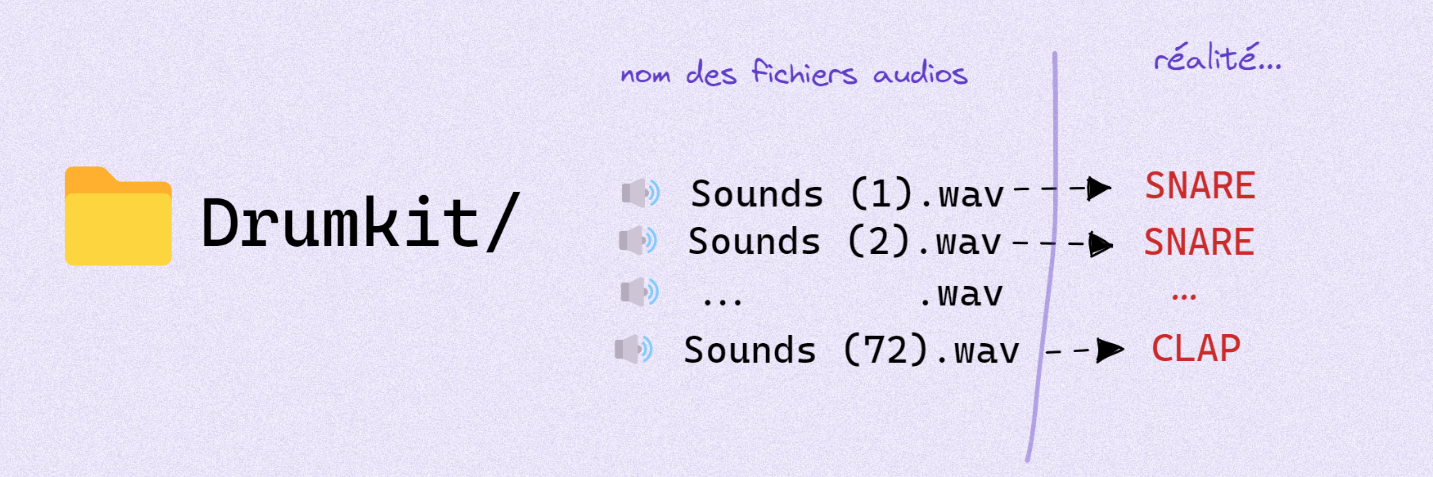

## II. Data Preparation
### II.1 Présentation du jeu de données (des classes de sons)

Ce jeu de données comprend plusieurs classes de sons, chacune correspondant à un type d'instrument/son différent.

![](../images/image_2023-05-16_051755420-removebg-preview.png)

In [1]:
from params import SOUNDS_DATASET_PATH
from tools import play_audio, get_all_audios_files
import os

class_names = [dir_name for dir_name in os.listdir(SOUNDS_DATASET_PATH) if
               os.path.isdir(os.path.join(SOUNDS_DATASET_PATH, dir_name))]
print(f"'{SOUNDS_DATASET_PATH}' contains {len(class_names)} classes: \n {class_names}")

'G:\Shared drives\PFE - ING3 Mlamali\DrumClassifier - Sounds Dataset' contains 14 classes: 
 ['Shaker', 'Bell', '808', 'Snap', 'Kick', 'Hat Open (Cymbal)', 'Ride (Cymbal)', 'Crash (Cymbal)', 'Hat Closed (Cymbal)', 'Metal', 'Tom', 'Clap', 'Conga', 'Snare']


Les classes de sons que j'ai décidé d'inclure dans ce projet, on a le :

- '808'
- 'Clap' : sons similaires aux applaudissements.
- 'Snap'
- 'Snare' : sons similaires à une caisse claire.
- 'Conga' : sons similaires aux instruments de percussion d'Afrique, tels que les bongos et les djembés.
- 'Bell'
- 'Shaker'
- 'Metal' : sons métalliques, tels que frapper un triangle, un agogo, des barres de planche à repasser
- 'Kick'
- 'Tom'
- 'Ride (Cymbal)' : sons similaires à une cymbale ride
- 'Crash (Cymbal)' :  sons similaires à une cymbale crash
- 'Hat Closed (Cymbal)':  sons similaires à une cymbale charleston ouverte
- 'Hat Open (Cymbal)' :  sons similaires à une cymbale charleston fermée

J’ai sélectionné méticuleusement ces 14 classes car elles représentent les sons de percussion essentiels, omniprésents dans la musique contemporaine et typiquement retrouvés dans les drum kits actuels.

Chaque son a sa propre "couleur", mais il existe une infinité de nuances subtiles entre les sons de la même classe.

Et c'est là que réside la complexité de la problématique. En effet, notre système entraîné ne devrait pas simplement dire qu'un son est un "kick" ou une "cymbale", il devra en réalité être capable de distinguer la subtile différence entre un "kick" lourd et profond et un "kick" plus léger et plus aigu, ou entre une cymbale "crash" retentissante et une cymbale "ride" plus douce.

### II.2. Préparation des données

En ce qui concerne la préparation des données, j'ai donc construit le jeu de données moi-même, en utilisant mes propres anciens "drumkits" (déjà triés) et des "drumkits" téléchargés sur Internet. Résultat : j’ai obtenu un jeu de données de 10 303 enregistrement audios d'une durée allant de 20 ms à 30sec

![](../images/img_11.png)

J'ai opté pour une répartition assez standard de 85% des données pour l'entraînement et 15% pour les tests.

Le script pour générer un dataset csv à partir des fichiers audios est disponible sous le nom `generate_dataset_csv.py`

In [2]:
audios_files = get_all_audios_files(SOUNDS_DATASET_PATH + "/Metal")
print(f"Found {len(audios_files)} audio files")

Found 2159 audio files



#### Vériﬁcation des données

Pour vérifier que les audios sont bien labellisés, j'ai fait le choix de les écouter un par un. Cela m'a permis de m'assurer que les données sont bien labellisées et de me familiariser avec les différents types de sons.

In [3]:
from pigeon import annotate
import pandas as pd

annotations = annotate(audios_files,
                       options=class_names,
                       display_fn=lambda file_path: play_audio(file_path),
                       shuffle=True)

HTML(value='0 examples annotated, 2160 examples left')

Dropdown(options=('Shaker', 'Bell', '808', 'Snap', 'Kick', 'Hat Open (Cymbal)', 'Ride (Cymbal)', 'Crash (Cymba…

Output()

In [4]:
# save annotations
df_annotation = pd.DataFrame(annotations)
df_annotation

""


#### Déplacement des fichiers audios
On déplace les fichiers audios dans leurs dossiers respectifs en fonction de leurs labels.

In [ ]:
def move_file(file_path, class_name):

    new_file_path = os.path.join(SOUNDS_DATASET_PATH, class_name, os.path.basename(file_path))
    try:
        os.rename(file_path, new_file_path)
    except FileExistsError:
        print(f" ! File {new_file_path} already exists, renaming it")
    except FileNotFoundError:
        print(f" ! File {file_path} not found")
        return
    except PermissionError:
        print(f" ! Permission denied for {file_path}")
        return
    else:
        print(f"... Moved {file_path} to {new_file_path}")
    return new_file_path
    os.rename(file_path, new_file_path)
    return new_file_path

def ask_for_confirmation(annotations):
    print(f" (y/n) Are you sure you want to move : ")
    for file_path, class_name in annotations:
        file_name = os.path.basename(file_path)
        parent_dir = os.path.basename(os.path.dirname(file_path))
        surname = f"'{parent_dir}/{file_name}'"
        print(f" - {surname} to '{class_name}/' ?")
        answer = input()
    if answer == "y":
        return True
    elif answer == "n":
        return False
    else:
        print("Please answer y or n")
        return False

def move_files_to_class_folders(annotations):
    print(f"> Found {len(annotations)} annotations")
    if ask_for_confirmation(annotations):
        for file_path, class_name in annotations:
            move_file(file_path, class_name)
    else:
        print("> Aborting")

move_files_to_class_folders(annotations)